# Linear regression Assignment

Build the linear regression model using scikit learn in boston data to
predict &#39;Price&#39; based on other dependent variable.
Here is the code to load the data:
Task: Deploy this assignment in any cloud platform.(Try to look for
free cloud platform)
Assignment: Submit assignment’s deployable link

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [45]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [46]:
#### Loading the data
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data["MDEV"]=boston.target
data.sample(10).style.background_gradient(cmap="coolwarm")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
448,9.329090,0.000000,18.100000,0.000000,0.713000,6.185000,98.700000,2.261600,24.000000,666.000000,20.200000,396.900000,18.130000,14.100000
252,0.082210,22.000000,5.860000,0.000000,0.431000,6.957000,6.800000,8.906700,7.000000,330.000000,19.100000,386.090000,3.530000,29.600000
111,0.100840,0.000000,10.010000,0.000000,0.547000,6.715000,81.600000,2.677500,6.000000,432.000000,17.800000,395.590000,10.160000,22.800000
280,0.035780,20.000000,3.330000,0.000000,0.442900,7.820000,64.500000,4.694700,5.000000,216.000000,14.900000,387.310000,3.760000,45.400000
490,0.207460,0.000000,27.740000,0.000000,0.609000,5.093000,98.000000,1.822600,4.000000,711.000000,20.100000,318.430000,29.680000,8.100000
287,0.038710,52.500000,5.320000,0.000000,0.405000,6.209000,31.300000,7.317200,6.000000,293.000000,16.600000,396.900000,7.140000,23.200000
235,0.330450,0.000000,6.200000,0.000000,0.507000,6.086000,61.500000,3.651900,8.000000,307.000000,17.400000,376.750000,10.880000,24.000000
269,0.090650,20.000000,6.960000,1.000000,0.464000,5.920000,61.500000,3.917500,3.000000,223.000000,18.600000,391.340000,13.650000,20.700000
45,0.171420,0.000000,6.910000,0.000000,0.448000,5.682000,33.800000,5.100400,3.000000,233.000000,17.900000,396.900000,10.210000,19.300000
229,0.441780,0.000000,6.200000,0.000000,0.504000,6.552000,21.400000,3.375100,8.000000,307.000000,17.400000,380.340000,3.760000,31.500000


In [47]:
#### Understand the Data - Exploratory Data Analysis (EDA)

#Number of rows and columns

data.shape

(506, 14)

In [48]:
#### Summary Statistics
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [49]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MDEV       229
dtype: int64

In [50]:
data_unique = {col : data[col].nunique() for col in data.columns}
data_unique

{'CRIM': 504,
 'ZN': 26,
 'INDUS': 76,
 'CHAS': 2,
 'NOX': 81,
 'RM': 446,
 'AGE': 356,
 'DIS': 412,
 'RAD': 9,
 'TAX': 66,
 'PTRATIO': 46,
 'B': 357,
 'LSTAT': 455,
 'MDEV': 229}

total number of missing values: 0


<AxesSubplot:>

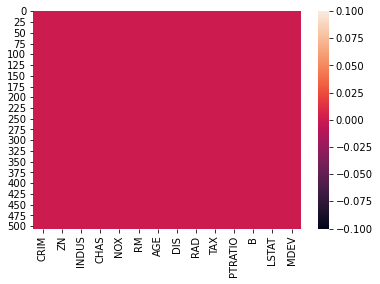

In [51]:

print('total number of missing values:',data.isnull().sum().sum())
sns.heatmap(data.isnull())

In [52]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [53]:
####Extracting Independent and dependent Variable  
X= data.drop(columns=["B","MDEV"],axis=1)
y= data["MDEV"]

In [54]:

# Splitting the dataset into training and test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state= 0) 

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
print(regressor.intercept_)

41.272274303630866


In [57]:
print(regressor.coef_)

[-1.22021112e-01  4.50817449e-02  7.23816444e-03  2.66915002e+00
 -1.69545780e+01  3.79210724e+00 -7.86210412e-03 -1.52502260e+00
  2.23971891e-01 -1.11656390e-02 -9.94502924e-01 -5.10691158e-01]


# Predictions

In [58]:
y_pred = regressor.predict(X_test)

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
329,22.6,24.955310
371,50.0,23.564199
219,23.0,29.380574
403,8.3,11.313529
78,21.2,21.289503
...,...,...
4,36.2,27.819459
428,11.0,15.770817
385,7.2,6.664185
308,22.8,28.397375


In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.7032920391803392
Mean Squared Error: 28.14679026854116
Root Mean Squared Error: 5.305354867352528
